In [1]:
import os
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

import utils

In [2]:
DATA_URL = 'https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt'

In [3]:
data_path = keras.utils.get_file(
    os.path.basename(DATA_URL),
    DATA_URL,
    cache_dir='./',
    cache_subdir=''
)

In [4]:
data = open(data_path).read()
corpus = data.lower().split("\n")

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [6]:
reverse_word_index = dict([(idx, word) for (word, idx) in tokenizer.word_index.items()])

In [7]:
total_words = len(tokenizer.word_index) + 1
total_words

2690

In [8]:
input_sequences = []
for line in corpus:
    sequence = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(sequence)):
        n_gram_sequence = sequence[:i+1]
        input_sequences.append(n_gram_sequence)

In [9]:
max_sequence_len = max(map(len, input_sequences))
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')
input_sequences = np.array(input_sequences)

xs, labels = input_sequences[:, :-1],input_sequences[:, -1]
ys = keras.utils.to_categorical(labels, num_classes=total_words)

In [10]:
print(input_sequences[2])
print(xs[2])
print(ys[2])
print(np.argmax(ys[2]))

[   0    0    0    0    0    0    0    0    0    0    0    0   51   12
   96 1217]
[ 0  0  0  0  0  0  0  0  0  0  0  0 51 12 96]
[0. 0. 0. ... 0. 0. 0.]
1217


In [11]:
model = keras.Sequential([
    keras.layers.Embedding(total_words, 100, input_length=max_sequence_len-1),
    keras.layers.Bidirectional(keras.layers.LSTM(150)),
    keras.layers.Dense(total_words, activation='softmax')
])

optimizer = keras.optimizers.Adam(0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
377/377 [==============================] - 4s 10ms/step - loss: 6.6265 - accuracy: 0.0771
Epoch 2/500
377/377 [==============================] - 4s 10ms/step - loss: 5.7420 - accuracy: 0.1128
Epoch 3/500
377/377 [==============================] - 3s 9ms/step - loss: 4.8679 - accuracy: 0.1646
Epoch 4/500
377/377 [==============================] - 4s 10ms/step - loss: 3.9697 - accuracy: 0.2324
Epoch 5/500
377/377 [==============================] - 4s 10ms/step - loss: 3.1316 - accuracy: 0.3345
Epoch 6/500
377/377 [==============================] - 4s 10ms/step - loss: 2.4537 - accuracy: 0.4482
Epoch 7/500
377/377 [==============================] - 4s 10ms/step - loss: 1.9555 - accuracy: 0.5455
Epoch 8/500
377/377 [==============================] - 4s 10ms/step - loss: 1.6300 - accuracy: 0.6093
Epoch 9/500
377/377 [==============================] - 4s 10ms/step - loss: 1.3592 - accuracy: 0.6740
Epoch 10/500
377/377 [==============================] - 4s 9ms/step - loss: 1.1920 

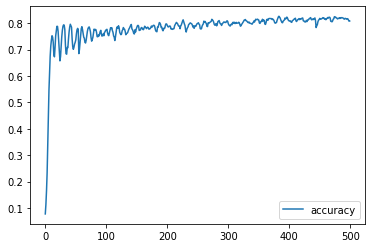

In [13]:
utils.plot_history(history, 'accuracy')

In [14]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	sequences = tokenizer.texts_to_sequences([seed_text])[0]
	sequences = pad_sequences([sequences], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(sequences)[0])
	output_word = reverse_word_index.get(predicted, "")
	seed_text += " " + output_word

print(seed_text)

I've got a bad feeling about this one evening fall upon his the new land far away cross over gilgarra wish says within tired tears irish laughter home again oer him down home jollity gone says gone by unseen way along my mind gone far away cross withdraw far away cross oer gilgarra mountain awhile able as revenge right into a half sinking funds far far away cross over them behind him marched in grim easy home each chance we phantom of kind until bride morgan gone and gone decay the covers buttoned down at us frivolity below o them gone by mooncoin upon gone says now
